# **`Data Analysis`**

In [151]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 30)

In [152]:
df=pd.read_csv(r'H:\Capstone2\data\processed\Clean NYC TLC.csv')
df.head(3)

,VendorID,pickup_datetime,dropoff_datetime,pickup_day,pickup_hour,Ket_Waktu,Durasi_perjalanan,time_in_seconds,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,payment_type,total_amount,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,minggu,0,Tengah Malam,0 days 00:11:01,661,1,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,1,24.18,1.0,2.75,Manhattan,Morningside Heights,Boro Zone
1,2,2023-01-01 00:01:31,2023-01-01 00:16:02,minggu,0,Tengah Malam,0 days 00:14:31,871,1,166,244,1.0,2.48,16.3,1.0,0.5,3.76,0.0,1.0,1,22.56,1.0,0.00,Manhattan,Morningside Heights,Boro Zone
2,2,2023-01-01 00:53:09,2023-01-01 01:13:35,minggu,0,Tengah Malam,0 days 00:20:26,1226,1,166,250,5.0,9.01,37.3,1.0,0.5,0.00,0.0,1.0,2,39.80,1.0,0.00,Manhattan,Morningside Heights,Boro Zone


In [148]:
df['drop_hour'] = pd.DatetimeIndex(df['dropoff_datetime']).hour
df["drop_hour"] = df["drop_hour"].astype('Int64')

In [149]:
df["pickup_datetime"] = df["pickup_datetime"].astype('datetime64[s]')
df["dropoff_datetime"] = df["dropoff_datetime"].astype('datetime64[s]')
df["Durasi_perjalanan"] = df["Durasi_perjalanan"].astype('timedelta64[s]')
df["time_in_seconds"] = df["time_in_seconds"].astype('int64')
df["pickup_hour"] = df["pickup_hour"].astype('int64')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67281 entries, 0 to 67280
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67281 non-null  int64         
 1   pickup_datetime        67281 non-null  datetime64[s] 
 2   dropoff_datetime       67281 non-null  datetime64[s] 
 3   pickup_day             67281 non-null  object        
 4   pickup_hour            67281 non-null  int64         
 5   Ket_Waktu              67281 non-null  object        
 6   Durasi_perjalanan      67281 non-null  timedelta64[s]
 7   time_in_seconds        67281 non-null  int64         
 8   RatecodeID             67281 non-null  int64         
 9   PULocationID           67281 non-null  int64         
 10  DOLocationID           67281 non-null  int64         
 11  passenger_count        67281 non-null  float64       
 12  trip_distance          67281 non-null  float64       
 13  f

#### `Analysis`

Semakin hari minat masyarakat dalam mengunakan taksi semakin menurun. Banyak taksi yang mulai berhenti beroprasi. dikutip dari The City jumlah taksi hijau telah menurun drastis dalam beberapa tahun terakhir, dari 6.500 pada tahun 2015 menjadi kurang dari 900 yang masih beroperasi pada tahun 2023, atau turun 86%.


`Problem Statement`
Berdasarkan permasalahan diatas kita akan mencoba meningkatkan minat masyrakat dalam menggunakan taksi dengan melihat :
- Waktu pickup
- Total pemasukan taksi disetiap jam
- Hari mana yang paling ramai 
- jenis pembayaran yang apa yang sering digunakan penumpang
- penumpang menggunakan taksi untuk trip jarak jauh atau jarak pendek

Text(0.5, 1.0, 'total amount for trips in every hour')

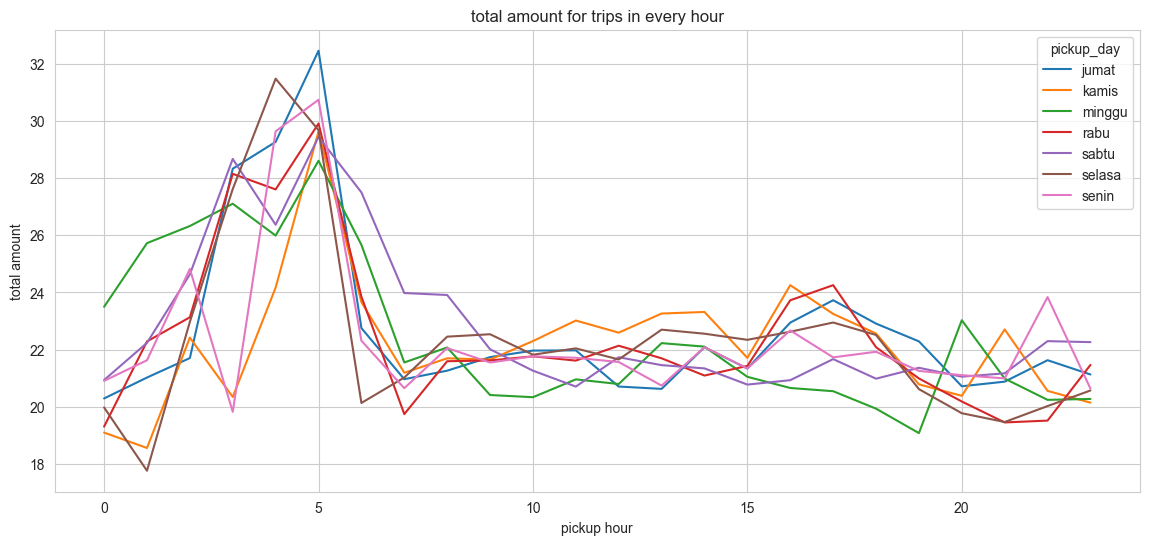

In [139]:
df.pivot_table('total_amount', index='pickup_hour', columns='pickup_day').plot(figsize=(14,6))
plt.xlabel('pickup hour');
plt.ylabel('total amount');
plt.title('total amount for trips in every hour') 


In [159]:
df.Ket_Waktu.value_counts()

Ket_Waktu
Malam           16827
Siang           15748
Sore            15360
Pagi            13833
Tengah Malam     4082
Subuh            1431
Name: count, dtype: int64

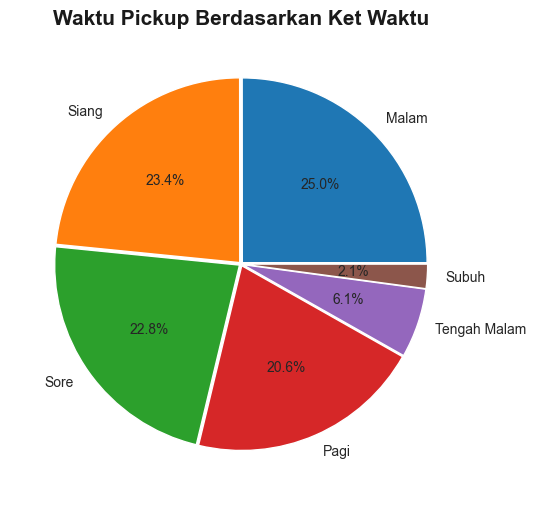

In [160]:
plt.figure(figsize=(6,6))

plt.pie(
    x= df.Ket_Waktu.value_counts(),  # isi dengan kolom numerical
    labels= ('Malam','Siang','Sore','Pagi','Tengah Malam','Subuh'),  # isi dengan kolom categorical
    autopct='%1.1f%%',                    # label percentage
    explode= (0.01, 0.01, 0.01, 0.01, 0.01, 0.01)
)

plt.title(
            "Waktu Pickup Berdasarkan Ket Waktu",
            color="#1a1a1a",
            fontsize=15,
            weight="bold"
        )

plt.show()

##### Insight
- Berdasarkan waktu, Pickup terbanyak terjadi di subuh, pagi, siang, dan sore dengan persentasi:
    - Malam 25%
    - Siang 23.4%
    - Sore 22.8%
    - Pagi 20.6%
- Total amount Tertinggi berdasarkan hari dan pickup hour ada di hari jumat sekitar jam 5
- Total amount Terendah  berdasarkan hari dan pickup hour ada di hari selasa 

Text(0, 0.5, 'Trip Distance')

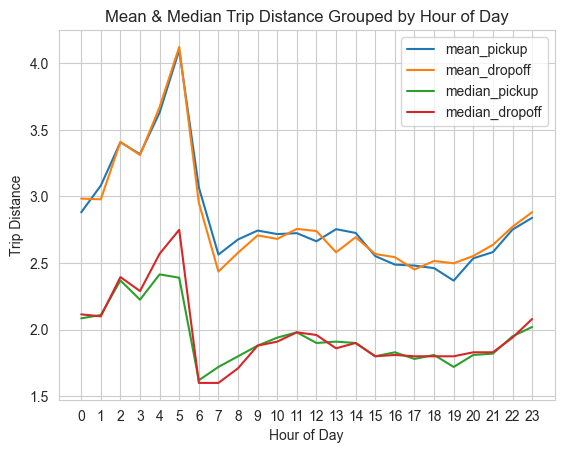

In [135]:
## group by hour, mean 
mean_pickup = df['trip_distance'].groupby(df['pickup_hour']).mean()
mean_dropoff = df['trip_distance'].groupby(df['drop_hour']).mean()

## group by hour, median
median_pickup = df['trip_distance'].groupby(df['pickup_hour']).median()
median_dropoff = df['trip_distance'].groupby(df['drop_hour']).median()

## create a dataframe 
dfdata = pd.concat([mean_pickup, mean_dropoff,
                median_pickup, median_dropoff], axis=1)
dfdata.columns = ['mean_pickup', 'mean_dropoff',
              'median_pickup', 'median_dropoff']


## visualize the dataframe
ax = dfdata.plot(title='Mean & Median Trip Distance Grouped by Hour of Day')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best') 
ax.set_xticks(np.arange(24))
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Trip Distance")

Dari gambar di atas, kita dapat melihat bahwa trip distance yang dikelompokkan berdasarkan jam yang dihitung dari Pickup dan DropOff time hampir sama
- median trip distance selalu lebih rendah dari mean trip distance
- Rata- rata perjalanan terjauh terjadi dijam 3 sampai 6
- trip distance terlihat pendek dijam 6 sampai jam 7 malam 

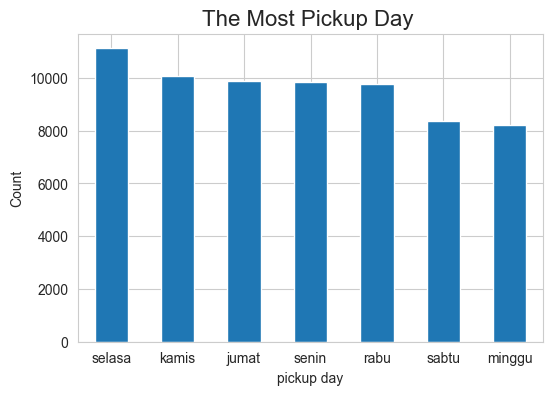

In [136]:
# Q5 : What is the most payment method used?
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
df.pickup_day.value_counts().plot.bar()
plt.xticks(rotation=360)
plt.xlabel("pickup day")
plt.ylabel("Count")
plt.title('The Most Pickup Day ', fontsize=16);
plt.show()

- Penjemputan paling tinggi terjadi dihari selasa dan terendah dihari minggu

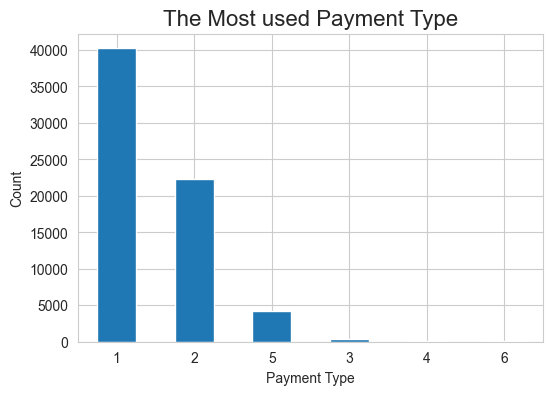

In [158]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
df.payment_type.value_counts().plot.bar()
plt.xticks(rotation=360)
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title('The Most used Payment Type', fontsize=16);
plt.show()

Payment Type :
- 1 : Credit card
- 2 : Cash
- 3 : No charge
- 4 : Dispute
- 5 : Unknown
- 6 : Voided trip

Berdasarkan data diatas Payment Type yang paling sering digunakan adalah Credit Card

### `Kesimpulan`

Berdasarkan analisis daiatas dapat disimpulkan bahwa :
- Orang-orang Cenderung menggunakan taksi Malam Hari dan Terendah subuh
- Total amount tertinggi ada dihari jumat dan orang-orang yang menggunakan jasa taksi saat subuh biasanya trip distancenya jauh
- Dari jam 6 pagi sampai 7 malam biasanya digunakan untuk trip jarak dekat
- Penjemputan paling tinggi dihari selasa dan terendah dihari minggu
- Payment Type yang Paling Sering digunakan adalah Credit Card

### `Saran`

Jika Perusahaan taksi ingin meningkatkan minat masyarakat dalam mengunakan taksi maka perusahaan perlu melakukan promo dihari sabtu dan minggu. Dengan banyaknya tempat wisata di New York seharusnya jumlah penggunaan taksi dihari sabtu dan minggu bisa ditingkatkan apalagi kalau ada promo bagi penumpang yang membayar dengan Credit card.